# Introduction



## Entreprise Apple

Apple Inc. est une entreprise technologique mondialement reconnue, fondée en 1976 par Steve Jobs, Steve Wozniak et Ronald Wayne. Basée à Cupertino, en Californie, Apple est célèbre pour ses produits emblématiques tels que l'iPhone, l'iPad et le Mac, ainsi que pour son système d'exploitation iOS. L'entreprise propose également une gamme de services, dont iTunes, l'App Store et iCloud. Grâce à son design innovant et à son écosystème intégré, Apple est devenue une référence d'excellence dans l'industrie technologique.





## Cahier Jupyter

Cet cahier d'analyse examine la performance boursière de Tesla à travers des visualisations. Il explore des indicateurs financiers clés tels que les prix historiques, le volume et la capitalisation boursière. Les visualisations comprennent des graphiques linéaires des prix de clôture au fil du temps, des indicateurs calculés tels que les rendements quotidiens et les moyennes mobiles, ainsi que des graphiques en chandeliers pour montrer les fluctuations quotidiennes des prix. Le cahier se termine par des conclusions et des enseignements clés. Il vise à aider les investisseurs et les analystes à prendre des décisions éclairées basées sur des données historiques et des insights visuels.

#  <br> <br> <br> <p style="text-align:center"><span style="font-size:72px">📚</span><span style="color:#8e44ad"><span style="font-size:48px"><span style="font-family:Comic Sans MS,cursive">&nbsp;Importation des Biblioth&eacute;ques&nbsp;</span></span></span></p>

<p style="text-align:center">&nbsp;</p>

<hr />
<p>&nbsp;</p>


In [6]:
#une bibliothèque de visualisation en 2D
import matplotlib.pyplot as plt

#une bibliothèque fondamentale pour le calcul numérique
import numpy as np

#une bibliothèque de visualisation de données et création des graphiques statistiques 
import seaborn as sns

#une bibliothèque qui offre des structures de données et des outils d'analyse de données puissants. 
import pandas as pd

# <br> <br> <br> <p style="text-align:center"><span style="font-size:72px">📊</span><span style="color:#8e44ad"><span style="font-size:48px"><span style="font-family:Comic Sans MS,cursive">&nbsp;Importation & Affichage des donn&eacute;es</span></span></span></p>

<p style="text-align:center">&nbsp;</p>

<hr />
<p>&nbsp;</p>


In [80]:
data = pd.read_csv("AAPL.csv")

#### Afficher les 5 prmiers Jours des Données


In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-12-06,0.261161,0.267857,0.250000,0.255580,0.216650,1374464000
1,2000-12-07,0.257813,0.265625,0.250000,0.255580,0.216650,408917600
2,2000-12-08,0.264509,0.273438,0.257813,0.268973,0.228003,435624000
3,2000-12-11,0.271205,0.274554,0.265625,0.271205,0.229895,332511200
4,2000-12-12,0.272321,0.285714,0.267857,0.274554,0.232734,386260000


#### Afficher les 5 Derniers Jours des Données


In [13]:
data.sort_values(by=['Date'] ,ascending=False).head()

,Date,Open,High,Low,Close,Adj Close,Volume
5784,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66371700
5783,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
5782,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300
5781,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
5780,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200


#### Copier les données pour les visualiser d'une maniére lisible Pour un non-connaisseur

In [66]:
vis = data.copy()

#### reformer les colonnes pour les visualiser


In [67]:
#Fonction pour reformuler les valeurs des colonnes , tout en gardent que 3 chiffres aprés virgules et ajouter symbole "$"
def dollar(x):
    x = round(x,3)
    return (str(x)+"$")

In [68]:
vis['Open'] = vis['Open'].apply(dollar)
vis['Close'] = vis['Close'].apply(dollar)

In [69]:
# Afficher les Colonnes : Date , Open , Close
vis = vis.sort_values(by=['Date'] ,ascending=False)
vis = vis.set_index('Date')
vis.iloc[:5,[0,3]]

,Open,Close
Date,,
2023-12-05,190.21$,193.42$
2023-12-04,189.98$,189.43$
2023-12-01,190.33$,191.24$
2023-11-30,189.84$,189.95$
2023-11-29,190.9$,189.37$


## Des Informations sur les donnés Chargées

In [71]:
dim = data.shape
print(f"le nombre de lignes: {dim[0]}")
print(f"le nombre de colonnes: {dim[1]}")

le nombre de lignes: 5785
le nombre de colonnes: 7


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5785 non-null   object 
 1   Open       5785 non-null   float64
 2   High       5785 non-null   float64
 3   Low        5785 non-null   float64
 4   Close      5785 non-null   float64
 5   Adj Close  5785 non-null   float64
 6   Volume     5785 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.5+ KB


In [74]:
#chercher s'il existe des valeurs manquantes
data.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# <br> <br> <br> <p style="text-align:center"><span style="font-size:48px">📈<span style="color:#8e44ad"><span style="font-family:Comic Sans MS,cursive">&nbsp;Analyse et Visualisation des donn&eacute;es&nbsp;</span></span>📉</span></p>

<p style="text-align:center">&nbsp;</p>

<hr />
<p>&nbsp;</p>


In [81]:
#verification type de Date
(data['Date'])

0       2000-12-06
1       2000-12-07
2       2000-12-08
3       2000-12-11
4       2000-12-12
           ...    
5780    2023-11-29
5781    2023-11-30
5782    2023-12-01
5783    2023-12-04
5784    2023-12-05
Name: Date, Length: 5785, dtype: object

In [82]:
#changement de type pour etre adaptable au travail
data['Date']=pd.to_datetime(data['Date'])

In [83]:
#verification type de Date
(data['Date'])

0      2000-12-06
1      2000-12-07
2      2000-12-08
3      2000-12-11
4      2000-12-12
          ...    
5780   2023-11-29
5781   2023-11-30
5782   2023-12-01
5783   2023-12-04
5784   2023-12-05
Name: Date, Length: 5785, dtype: datetime64[ns]

# <br> <br> <p style="text-align:center"><span style="font-size:48px">📊&nbsp;</span><span style="font-size:48px"><span style="color:#8e44ad"><span style="font-family:Comic Sans MS,cursive">Prix De L&#39;action</span></span>💲</span></p>

<p style="text-align:center">&nbsp;</p>

<hr />
<p>&nbsp;</p>


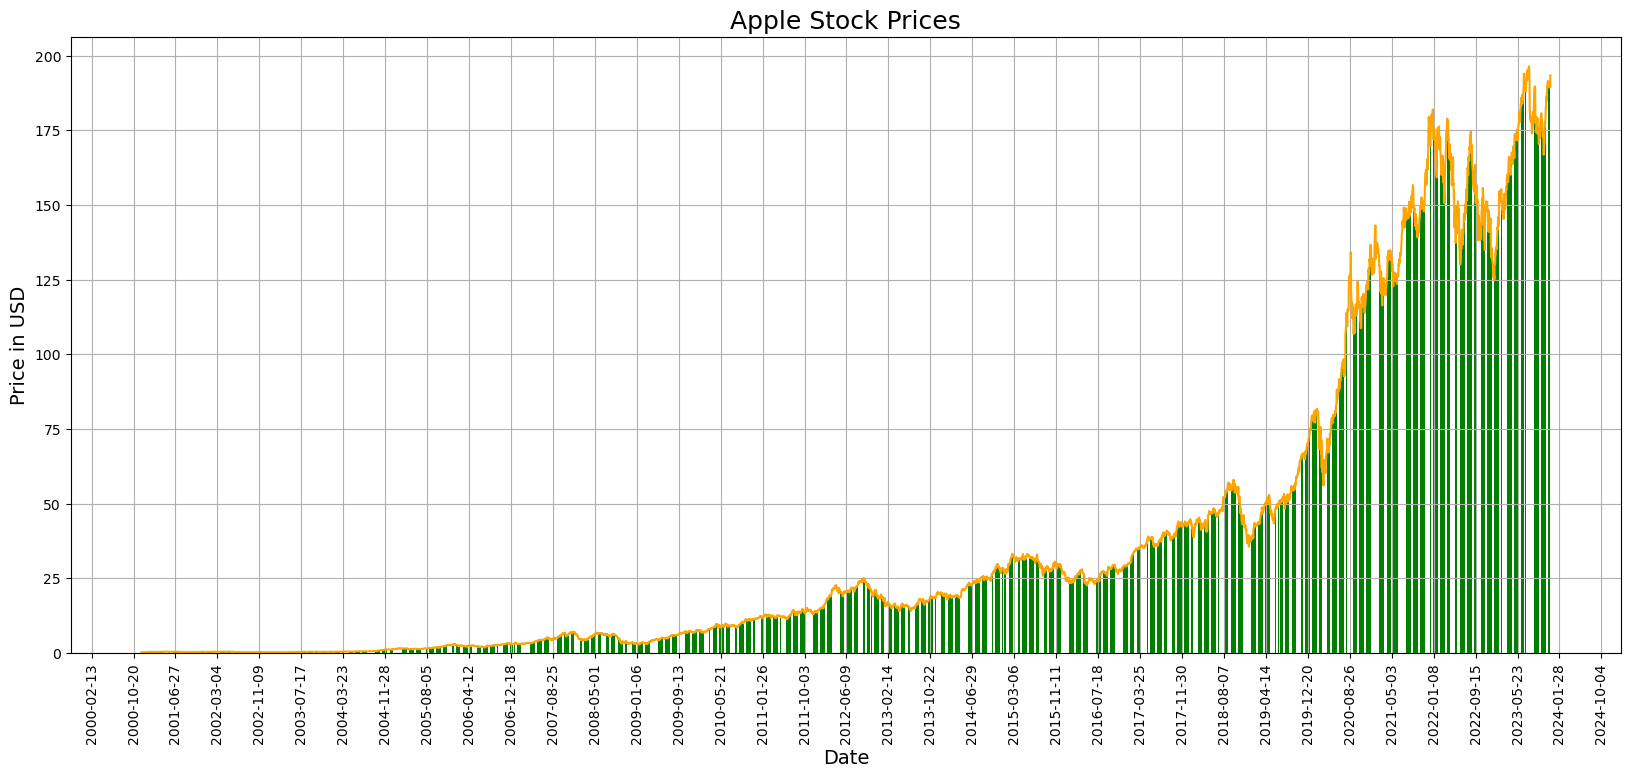

In [168]:
# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Close'], color='orange')
ax.bar(data['Date'], data['Close'], color='green')
plt.xticks(rotation=90 , fontsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Apple Stock Prices', fontsize=18)
plt.grid()
plt.show()

## Calculer la difference de changement d'une facon quotidienne


In [148]:
#Trier les donnés par ordre decroissant selon la date
data = data.sort_values(by=['Date'] ,ascending=False)

#Ajouter une nouvelle colonne au data
data['diff'] = data['Close'] - data['Close'].shift(-1)

#Corriger les erreurs en remplacant le dernier valeur de NaN à 0
data.replace(np.nan, 0, inplace=True)

In [149]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,diff
5784,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66371700,3.990005
5783,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,-1.810012
5782,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,1.290008
5781,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,0.580002
5780,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,-1.029999
...,...,...,...,...,...,...,...,...
4,2000-12-12,0.272321,0.285714,0.267857,0.274554,0.232734,386260000,0.003349
3,2000-12-11,0.271205,0.274554,0.265625,0.271205,0.229895,332511200,0.002232
2,2000-12-08,0.264509,0.273438,0.257813,0.268973,0.228003,435624000,0.013393
1,2000-12-07,0.257813,0.265625,0.250000,0.255580,0.216650,408917600,0.000000


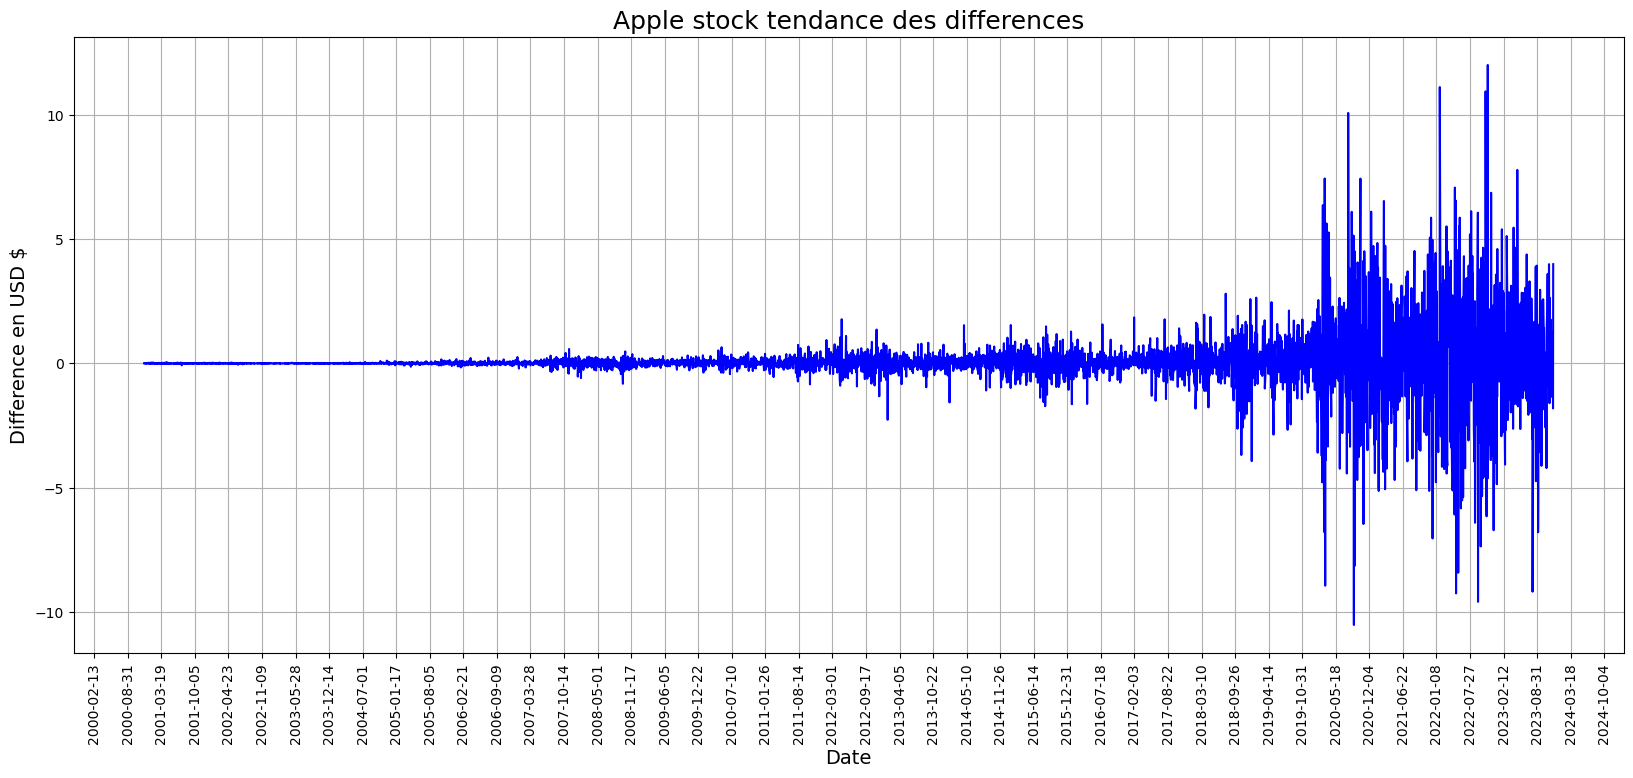

In [150]:
# Plotting the stock prices of Apple

# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['diff'], color='blue')
plt.xticks(rotation=90 , fontsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Difference en USD $', fontsize=14)
plt.title('Apple stock tendance des differences', fontsize=18)
plt.grid()
plt.show()

 ## Calculer la moyenne mobile

La moyenne mobile consiste à calculer la moyenne des valeurs d'une série sur une période spécifiée, puis à déplacer cette fenêtre temporelle d'une période à la fois, en recalculant la moyenne à chaque étape. Cela permet de créer une nouvelle série de données qui représente une tendance lissée de la série originale.

In [180]:
data = data.sort_values(by=['Date'] ,ascending=True)

#Ajouter une colonne pour la moyenne mobile de 30 donnés précédentes (+- 1 mois)
data['m30m'] = data['Close'].rolling(30).mean()

In [188]:
data = data.drop(columns = ["m90m"], axis=1)
data

,Date,Open,High,Low,Close,Adj Close,Volume,diff,m30m
0,2000-12-06,0.261161,0.267857,0.250000,0.255580,0.216650,1374464000,0.000000,NaN
1,2000-12-07,0.257813,0.265625,0.250000,0.255580,0.216650,408917600,0.000000,NaN
2,2000-12-08,0.264509,0.273438,0.257813,0.268973,0.228003,435624000,0.013393,NaN
3,2000-12-11,0.271205,0.274554,0.265625,0.271205,0.229895,332511200,0.002232,NaN
4,2000-12-12,0.272321,0.285714,0.267857,0.274554,0.232734,386260000,0.003349,NaN
...,...,...,...,...,...,...,...,...,...
5780,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,-1.029999,181.047000
5781,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,0.580002,181.517333
5782,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,1.290008,182.043333
5783,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,-1.810012,182.595000


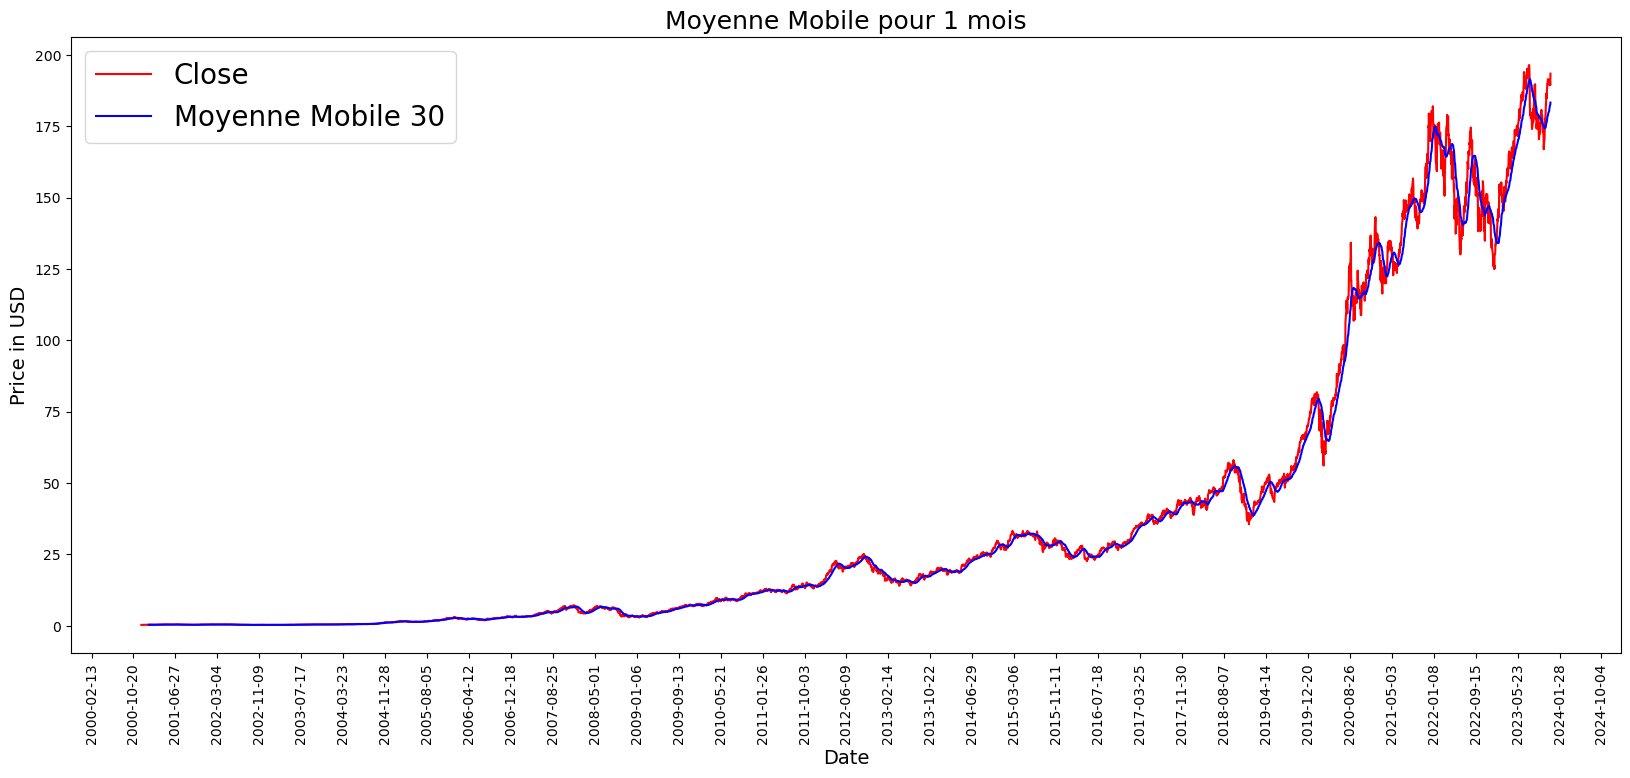

In [190]:
# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Close'],label="Close", color='red')
ax.plot(data['Date'], data['m30m'],label="Moyenne Mobile 30", color='blue')
plt.xticks(rotation=90 , fontsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Moyenne Mobile pour 1 mois', fontsize=18)
plt.legend( fontsize="20")
plt.show()

# <br> <br> <p style="text-align:center"><span style="font-size:48px">📊&nbsp;<span style="color:#e67e22"><span style="font-family:Comic Sans MS,cursive">Visualisation de Volume</span></span>📃</span></p>

<p style="text-align:center">&nbsp;</p>

<hr />
<p>&nbsp;</p>


In [204]:
# Ajouter une colonne Year
data['Year'] = data['Date'].dt.year
data

,Date,Open,High,Low,Close,Adj Close,Volume,diff,m30m,Year
0,2000-12-06,0.261161,0.267857,0.250000,0.255580,0.216650,1374464000,0.000000,NaN,2000
1,2000-12-07,0.257813,0.265625,0.250000,0.255580,0.216650,408917600,0.000000,NaN,2000
2,2000-12-08,0.264509,0.273438,0.257813,0.268973,0.228003,435624000,0.013393,NaN,2000
3,2000-12-11,0.271205,0.274554,0.265625,0.271205,0.229895,332511200,0.002232,NaN,2000
4,2000-12-12,0.272321,0.285714,0.267857,0.274554,0.232734,386260000,0.003349,NaN,2000
...,...,...,...,...,...,...,...,...,...,...
5780,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,-1.029999,181.047000,2023
5781,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,0.580002,181.517333,2023
5782,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,1.290008,182.043333,2023
5783,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,-1.810012,182.595000,2023


In [215]:
#Convertit les valeur scientifuques (e+09) vers le type entier
def convert(x):
    return (int(float(x)))

In [216]:
#appliquer le moyen de Volume Pour Chaque Année
Volume_ann = data.groupby(['Year'])['Volume'].mean().reset_index()
Volume_ann["Volume"] = Volume_ann["Volume"].apply(convert)


In [217]:
# Trier les donnees
Volume_ann = Volume_ann.sort_values(by = 'Year')
Volume_ann

,Year,Volume
0,2000,440456800
1,2001,381684664
2,2002,305610822
3,2003,282659733
4,2004,483339955
5,2005,723813422
6,2006,859358430
7,2007,984047751
8,2008,1130360498
9,2009,568467011


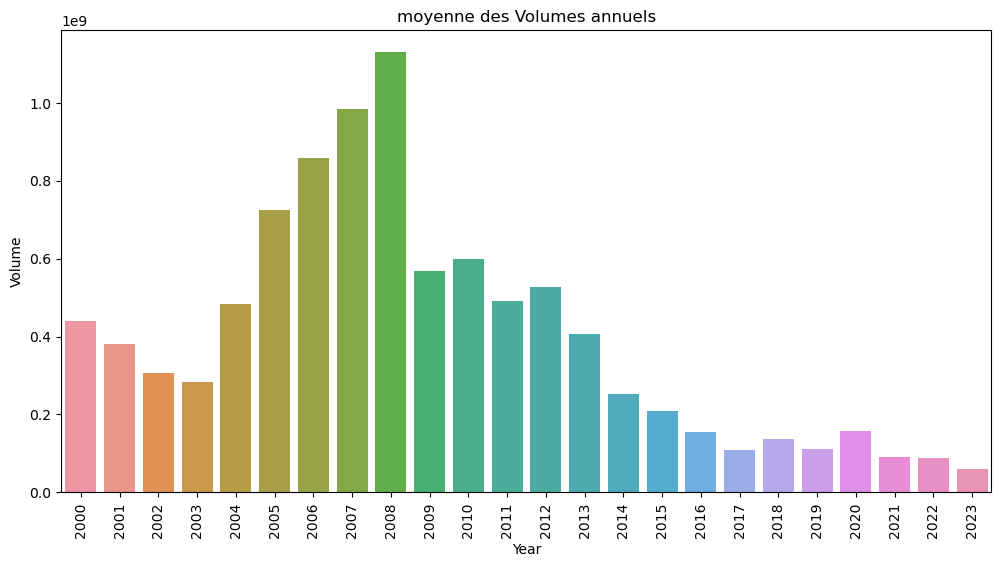

In [222]:
plt.figure(figsize=(12, 6))
sns.barplot(data=Volume_ann, x='Year', y='Volume')
plt.title('moyenne des Volumes annuels')
plt.xlabel('Year')
plt.xticks(rotation=90 , fontsize=10)
plt.ylabel('Volume')
plt.ticklabel_format(axis='y', style='sci')
plt.show()